<a href="https://colab.research.google.com/github/dyjs-js/DaconStudy/blob/main/dacon/JejuTraffic/JejuTrafficFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [2]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
!pwd

/content


In [4]:
!unzip -uq "/gdrive/MyDrive/data/jejuTraffic/open.zip" -d"/content"

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import gc


#csv to parquet
-> 메모리에 효율적인 데이터 유형을 사용하여 용량을 크게 줄이고 빠른 작업이 가능합니다.

In [6]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [7]:
csv_to_parquet('./open/train.csv', 'train')
csv_to_parquet('./open/test.csv', 'test')

train Done.
test Done.


In [8]:
train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')

#데이터 살펴보기

In [9]:
info=pd.read_csv('open/data_info.csv')
smpl_sub=pd.read_csv('open/sample_submission.csv')

In [10]:
info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [11]:
print(train.shape)
print(test.shape)

(4701217, 23)
(291241, 22)


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     291241 non-null  object 
 1   base_date              291241 non-null  int64  
 2   day_of_week            291241 non-null  object 
 3   base_hour              291241 non-null  int64  
 4   lane_count             291241 non-null  int64  
 5   road_rating            291241 non-null  int64  
 6   road_name              291241 non-null  object 
 7   multi_linked           291241 non-null  int64  
 8   connect_code           291241 non-null  int64  
 9   maximum_speed_limit    291241 non-null  float64
 10  vehicle_restricted     291241 non-null  float64
 11  weight_restricted      291241 non-null  float64
 12  height_restricted      291241 non-null  float64
 13  road_type              291241 non-null  int64  
 14  start_node_name        291241 non-nu

##널 값 확인

In [14]:
train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [15]:
test.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64

In [16]:
train.head()
#day_of_week road_name start_turn_restricted end_turn_restricted -> 라벨인코더

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


##변수의 빈도수 확인

In [17]:
train['day_of_week'].value_counts().index

Index(['금', '수', '목', '일', '토', '화', '월'], dtype='object')

In [18]:
#day_of_week road_name start_turn_restricted end_turn_restricted 
# valuedatalist=['day_of_week', 'road_name', 'start_turn_restricted', 'end_turn_restricted']

# for i in valuedatalist:
#   print(train[i].value_counts())
  # print(i)


train['day_of_week'].value_counts()


금    684024
수    675583
목    674070
일    673632
토    669767
화    662498
월    661643
Name: day_of_week, dtype: int64

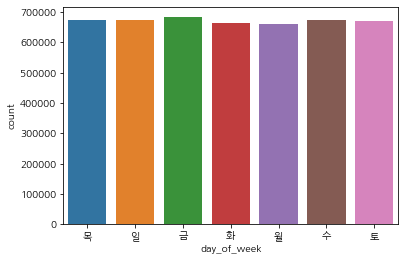

In [19]:
sns.countplot(x='day_of_week',data=train)
plt.show()

In [20]:
train['road_name'].value_counts()

일반국도12호선    1046092
-            569463
일반국도16호선     554510
일반국도95호선     248181
일반국도11호선     215701
             ...   
애원로            7718
아봉로            7342
남조로            6813
호서중앙로          2819
호근로             587
Name: road_name, Length: 61, dtype: int64

In [21]:
train['start_turn_restricted'].value_counts()

없음    4239701
있음     461516
Name: start_turn_restricted, dtype: int64

In [22]:
train['end_turn_restricted'].value_counts()


없음    4239599
있음     461618
Name: end_turn_restricted, dtype: int64

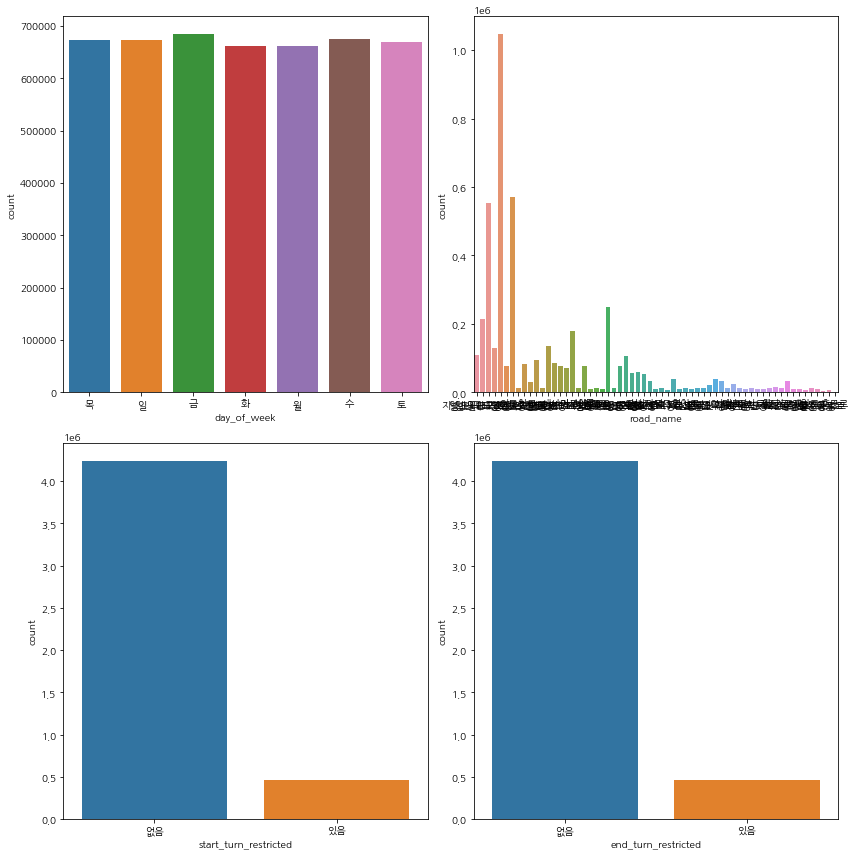

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))

sns.countplot(x='day_of_week', data=train, ax=axes[0][0])
sns.countplot(x='road_name', data=train, ax=axes[0][1])
sns.countplot(x='start_turn_restricted', data=train, ax=axes[1][0])
sns.countplot(x='end_turn_restricted', data=train, ax=axes[1][1])


plt.tight_layout()
plt.show()


decribe()함수

count: 해당 column에서 비어 있지 않은 값의 개수

mean: 평균

std: 표준편차

min: 최솟값 (이상치 포함)

25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값

50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)

75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값

max: 최댓값 (이상치 포함)

In [24]:
train.describe()
# vehicle_restricted/height_restricted/base_date/target/start_node_name/end_node_name/id제거
#day_of_week road_name start_turn_restricted end_turn_restricted -> 라벨인코더

##mean과 50%가 크게 차이나면 이상치가 다수 존재할것으로 예상(multi_linked,weight_restricte,,,등등)

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
count,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4701217.0,4.701217e+06,4701217.0,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06
mean,2.021672e+07,1.192820e+01,1.836651e+00,1.049585e+02,4.762597e-04,2.660218e-01,6.125329e+01,0.0,5.618742e+03,0.0,6.152237e-01,3.338432e+01,1.265217e+02,3.338432e+01,1.265217e+02,4.278844e+01
std,4.555709e+03,6.722092e+00,6.877513e-01,1.840107e+00,2.181818e-02,5.227760e+00,1.213354e+01,0.0,1.395343e+04,0.0,1.211268e+00,1.012015e-01,1.563657e-01,1.011948e-01,1.563519e-01,1.595443e+01
min,2.021090e+07,0.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,3.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.324343e+01,1.261826e+02,3.324343e+01,1.261826e+02,1.000000e+00
25%,2.021110e+07,6.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,5.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.326422e+01,1.264232e+02,3.326422e+01,1.264232e+02,3.000000e+01
50%,2.022013e+07,1.200000e+01,2.000000e+00,1.060000e+02,0.000000e+00,0.000000e+00,6.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.341257e+01,1.265112e+02,3.341257e+01,1.265112e+02,4.300000e+01
75%,2.022050e+07,1.800000e+01,2.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,7.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.347804e+01,1.265840e+02,3.347804e+01,1.265840e+02,5.400000e+01
max,2.022073e+07,2.300000e+01,3.000000e+00,1.070000e+02,1.000000e+00,1.030000e+02,8.000000e+01,0.0,5.000000e+04,0.0,3.000000e+00,3.355608e+01,1.269309e+02,3.355608e+01,1.269309e+02,1.130000e+02


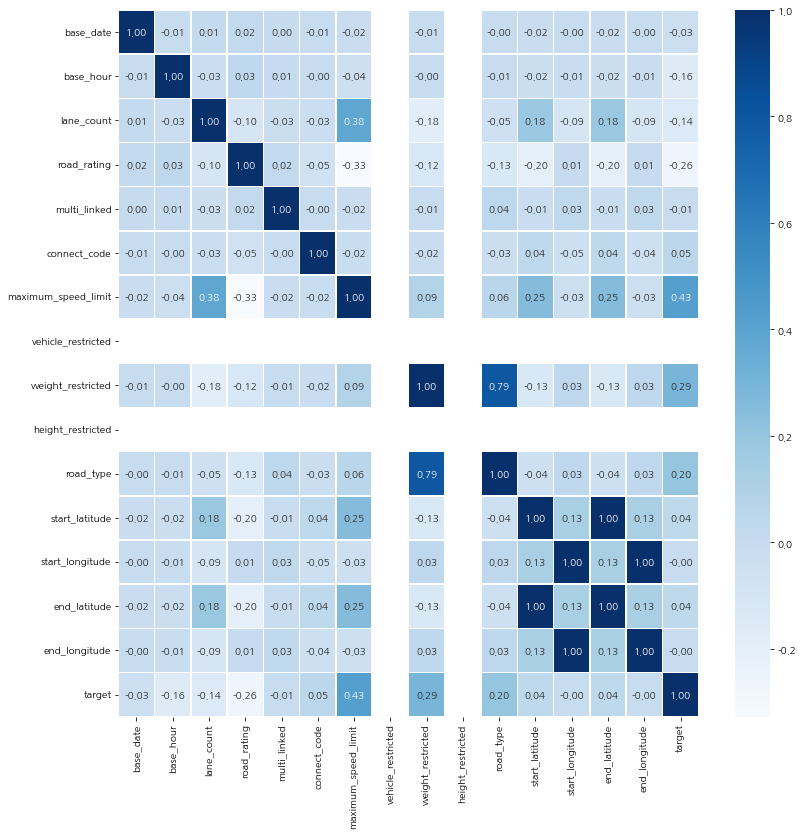

In [25]:
plt.figure(figsize=(13,13))
sns.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [26]:
train.corr()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
base_date,1.000000,-0.008645,0.011463,0.018547,0.000832,-0.010633,-0.018713,NaN,-0.011030,NaN,-0.004599,-0.016818,-0.004954,-0.016786,-0.004972,-0.033997
base_hour,-0.008645,1.000000,-0.029194,0.031658,0.005711,-0.002649,-0.036756,NaN,-0.003231,NaN,-0.007880,-0.021599,-0.011478,-0.021597,-0.011489,-0.159407
lane_count,0.011463,-0.029194,1.000000,-0.095717,-0.026555,-0.029290,0.384002,NaN,-0.177224,NaN,-0.050715,0.182674,-0.094806,0.182330,-0.094732,-0.144256
road_rating,0.018547,0.031658,-0.095717,1.000000,0.024218,-0.054160,-0.327474,NaN,-0.118630,NaN,-0.125618,-0.204793,0.007401,-0.204843,0.007386,-0.261693
multi_linked,0.000832,0.005711,-0.026555,0.024218,1.000000,-0.001111,-0.020245,NaN,-0.008790,NaN,0.042977,-0.014906,0.026895,-0.014907,0.026896,-0.008408
connect_code,-0.010633,-0.002649,-0.029290,-0.054160,-0.001111,1.000000,-0.015190,NaN,-0.020491,NaN,-0.025846,0.036623,-0.045695,0.037163,-0.044853,0.048348
maximum_speed_limit,-0.018713,-0.036756,0.384002,-0.327474,-0.020245,-0.015190,1.000000,NaN,0.085080,NaN,0.059511,0.253147,-0.033018,0.252958,-0.032907,0.425715
vehicle_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_restricted,-0.011030,-0.003231,-0.177224,-0.118630,-0.008790,-0.020491,0.085080,NaN,1.000000,NaN,0.792803,-0.128291,0.034926,-0.128305,0.034915,0.294092
height_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#컬럼수가 많아서 target과 상관도가 높은 순서대로 출력해봄

corr_mat=train.corr()
corr_mat['target'].sort_values(ascending=False)


# vehicle_restricted/height_restricted/base_date/target/start_node_name/end_node_name/id제거----> 여기서 base_date를 다시 넣음
#day_of_week road_name start_turn_restricted end_turn_restricted -> 라벨인코더
#maximum_speed_limit / weight_restricted / road_rating  / road_type    ---> 상관관계가 높은 네가지만 이상치 확인

## 최종
#vehicle_restricted/height_restricted/target/start_node_name/end_node_name/id 제거
#start_longitude랑 end_longitude /// end_latitude랑 start_latitude 이상치 확인

target                 1.000000
maximum_speed_limit    0.425715
weight_restricted      0.294092
road_type              0.200840
connect_code           0.048348
start_latitude         0.036280
end_latitude           0.036139
end_longitude         -0.001000
start_longitude       -0.001168
multi_linked          -0.008408
base_date             -0.033997
lane_count            -0.144256
base_hour             -0.159407
road_rating           -0.261693
vehicle_restricted          NaN
height_restricted           NaN
Name: target, dtype: float64

##이상치처리

In [28]:
train['maximum_speed_limit'].value_counts()

60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: maximum_speed_limit, dtype: int64

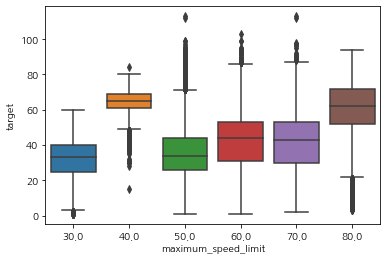

In [29]:
sns.boxplot(x='maximum_speed_limit',data=train, y='target')

In [30]:
#통과제한하중
train['weight_restricted'].value_counts()

0.0        4032874
43200.0     410361
32400.0     239305
50000.0      18677
Name: weight_restricted, dtype: int64

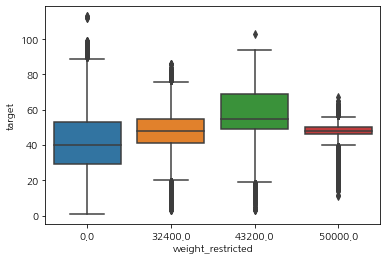

In [31]:
sns.boxplot(x='weight_restricted',data=train, y='target')

In [32]:
# test=train[train['weight_restricted']<50000.0]
# test.head()

In [33]:
# train.drop(index1)
# #boolean indexing

In [34]:
train['road_rating'].value_counts()

103    2159511
107    1582214
106     959492
Name: road_rating, dtype: int64

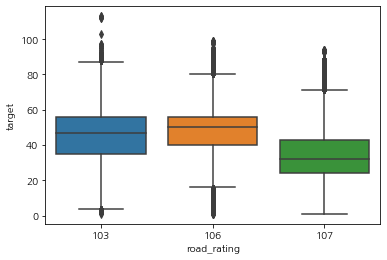

In [35]:
sns.boxplot(x='road_rating', data=train, y='target')
#seaborn library사용 // dataframe count함수

In [36]:
train['road_type'].value_counts()

0    3737117
3     964100
Name: road_type, dtype: int64

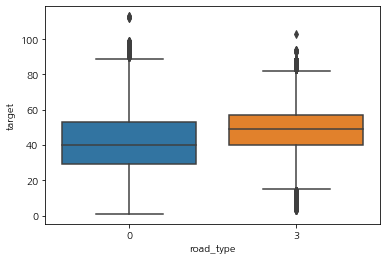

In [37]:
sns.boxplot(x='road_type', data=train, y='target')

In [38]:
#start_longitude랑 end_longitude /// end_latitude랑 start_latitude 이상치 확인

train['start_longitude'].value_counts()

126.567766    23291
126.736249    20775
126.456384    18137
126.556173    18084
126.505998    18076
              ...  
126.682267      881
126.677154      788
126.524410      744
126.524429      744
126.525745      587
Name: start_longitude, Length: 586, dtype: int64

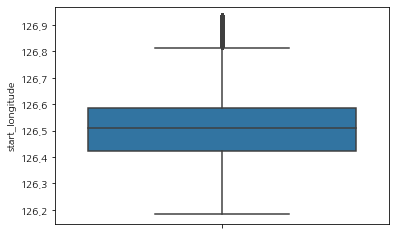

In [39]:
sns.boxplot(y='start_longitude', data=train)

In [40]:
len(train)

4701217

In [41]:
# test=train[train['weight_restricted']<50000.0]
# test.head()

train=train[train['start_longitude']<126.8]

In [42]:
len(train)

4419076

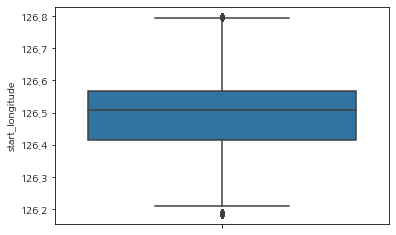

In [43]:
sns.boxplot(y='start_longitude', data=train)

In [44]:
train['end_longitude'].value_counts()

126.567766    23126
126.736249    20791
126.456384    18168
126.505998    18126
126.556173    18083
              ...  
126.680766      881
126.678235      788
126.524331      744
126.524410      744
126.524429      587
Name: end_longitude, Length: 546, dtype: int64

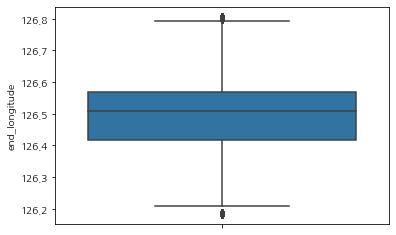

In [45]:
sns.boxplot(y='end_longitude', data=train)

In [46]:
len(train)

4419076

In [47]:
train=train[train['end_longitude']<126.8] 

In [48]:
len(train)

4408917

In [49]:
train['start_latitude'].value_counts()

33.248633    23291
33.435941    20775
33.465863    18137
33.507349    18084
33.500330    18076
             ...  
33.491729      881
33.437249      788
33.261270      744
33.256671      744
33.257401      587
Name: start_latitude, Length: 544, dtype: int64

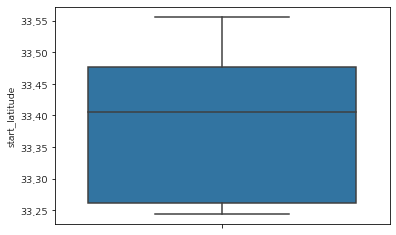

In [50]:
sns.boxplot(y='start_latitude', data=train)

In [51]:
train['end_latitude'].value_counts()

33.248633    23126
33.435941    20791
33.465863    18168
33.500330    18126
33.507349    18083
             ...  
33.491567      881
33.468664      788
33.254153      744
33.256671      744
33.261270      587
Name: end_latitude, Length: 544, dtype: int64

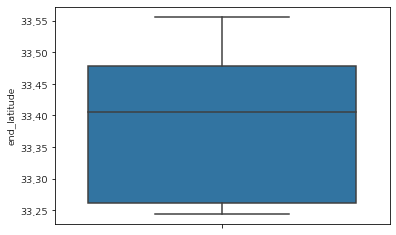

In [52]:
sns.boxplot(y='end_latitude', data=train)

In [53]:
# target 이상치 제거 / 속도 100km 이상 제거
len(train)

4408917

In [54]:
train=train[train.target<100]

In [55]:
#5개 감소
len(train)

4408912

##라벨인코딩

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

str_col=['day_of_week','road_name','start_turn_restricted','end_turn_restricted','start_node_name','end_node_name']
# vehicle_restricted/height_restricted/base_date/target/start_node_name/end_node_name/id제거----> 여기서 base_date를 다시 넣음 
#day_of_week road_name start_turn_restricted end_turn_restricted -> 라벨인코더
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    train[i]=le.transform(train[i])
    test[i]=le.transform(test[i])



In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4408912 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            int64  
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              int64  
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        int64  
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  int64  
 18  end_node_name          int64  
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    int64  
 22  target            

##데이터정리

In [58]:
train_x=train.drop(['vehicle_restricted','height_restricted','id','target','start_node_name','end_node_name'],axis=1)
train_y=train['target']
test=test.drop(['vehicle_restricted','height_restricted','id','start_node_name','end_node_name'],axis=1)
# vehicle_restricted/height_restricted/base_date/target/start_node_name/end_node_name/id제거



print(train_x.shape)
print(train_y.shape)
print(test.shape)

(4408912, 17)
(4408912,)
(291241, 17)


In [59]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4408912 entries, 0 to 4701216
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   base_date              int64  
 1   day_of_week            int64  
 2   base_hour              int64  
 3   lane_count             int64  
 4   road_rating            int64  
 5   road_name              int64  
 6   multi_linked           int64  
 7   connect_code           int64  
 8   maximum_speed_limit    float64
 9   weight_restricted      float64
 10  road_type              int64  
 11  start_latitude         float64
 12  start_longitude        float64
 13  start_turn_restricted  int64  
 14  end_latitude           float64
 15  end_longitude          float64
 16  end_turn_restricted    int64  
dtypes: float64(6), int64(11)
memory usage: 605.5 MB


#모델링

In [ ]:
x_train,x_valid,y_train,y_valid=train_test_split(train_x,train_y,test_size=0.2, shuffle=True,random_state=5)

In [ ]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((3527129, 17), (881783, 17), (3527129,), (881783,))

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
#Feature Scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_valid=sc.transform(x_valid)

## lightGbm

In [ ]:
import lightgbm as lgb
from lightgbm.callback import early_stopping

In [ ]:
gbm=lgb.LGBMRegressor( n_estimators=50, learning_rate=0.12, boosting_type='dart', skip_drop=0.7, random_state=42)

In [ ]:
gbm.fit(x_train, y_train)

LGBMRegressor(boosting_type='dart', learning_rate=0.12, n_estimators=50,
              random_state=42, skip_drop=0.7)


- 1차</br>
RMSE : 5.976407073661071</br>
MSE : 35.71744151010609</br>
MAE : 4.511445240503673</br>

- 2차 </br>
'start_longitude','end_longitude' 삭제 후 성능이 안좋아짐</br>
RMSE : 6.229963558817937</br>
MSE : 38.81244594419946</br>
MAE : 4.749155494313651</br>

- 3차 </br>
'start_longitude','end_longitude' 삭제 후 이상치 제거 (start_longitude/end_longitude/target)</br>
RMSE : 5.901309119919977</br>
MSE : 34.825449328850695</br>
MAE : 4.464146832762985</br>

- 4차 </br> start_node_name','end_node_name 삭제 후 이상치 제거</br>
RMSE : 5.842765854855477</br>
MSE : 34.13791283466505</br>
MAE : 4.413123587254376</br>


In [ ]:
pred_gbm=gbm.predict(x_valid)
print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_valid, pred_gbm))))
print('MSE : {}'.format((mean_squared_error(y_valid, pred_gbm))))
print('MAE : {}'.format((mean_absolute_error(y_valid, pred_gbm))))


RMSE : 8.25495494475863
MSE : 68.14428113999496
MAE : 6.687778878823687


In [98]:
pred_gbm

array([32.29441299, 40.78533313, 31.70384221, ..., 19.94274362,
       30.20776286, 55.39753326])

##random forest모델 학습 ///미사용

In [ ]:
#make a model
from sklearn.ensemble import RandomForestRegressor
RandomForest=RandomForestRegressor(n_estimators=100)
RandomForest.fit(x_train,y_train)
pred_random=RandomForest.predict(x_valid)


KeyboardInterrupt: ignored

In [ ]:
print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_valid, pred_random))))
print('MSE : {}'.format((mean_squared_error(y_valid, pred_random))))
print('MAE : {}'.format((mean_absolute_error(y_valid, pred_random))))

##XGBoost + RandomizedSearchCv ///속도가 너무 느려서 미사용

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
parameters = {'n_estimaotrs':[100,200], 'max_depth':[2,3]}

xgb_best_params = RandomizedSearchCV(xgb, parameters, cv=5)
print(xgb_best_params)

xgb = XGBRegressor(n_estimators = 200)
xgb.fit(x_train, y_train)
pred_xgb = xgb.predict(x_valid)

print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_valid, pred_xgb))))
print('MSE : {}'.format((mean_squared_error(y_valid, pred_xgb))))
print('MAE : {}'.format((mean_absolute_error(y_valid, pred_xgb))))

#RMSE : 7.080296355768671
#MSE : 50.13059648551113
#MAE : 5.408026618363676

#RMSE : 7.99545433843588
#MSE : 63.92729007801314
#MAE : 6.174269745582469


RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [2, 3],
                                        'n_estimaotrs': [100, 200]})
[15:33:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE : 7.99545433843588
MSE : 63.92729007801314
MAE : 6.174269745582469


In [ ]:
test=test.drop(['start_node_name','end_node_name'],axis=1)

#실제 데이터로 모델링 적용

In [70]:
#Feature Scaling
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test=sc.transform(test)

##LightGBM

In [71]:
import lightgbm as lgb
from lightgbm.callback import early_stopping
gbm=lgb.LGBMRegressor( n_estimators=200, learning_rate=0.12, boosting_type='dart', skip_drop=0.7, random_state=42)

In [72]:
gbm.fit(train_x, train_y)
pred_gbm_f=gbm.predict(test)

In [73]:
pred_gbm_f

array([25.52052618, 44.62674204, 58.79396884, ..., 21.51551396,
       25.24618681, 42.13986851])

##XGBoost + RandomizedSearchCv

In [ ]:
xgb = XGBRegressor(n_estimators = 200)
xgb.fit(train_x, train_y)
pred_xgb_f = xgb.predict(test)

[15:55:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:48] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


#제출

In [74]:
smpl_sub['target']=pred_gbm_f

In [75]:
smpl_sub

,id,target
0,TEST_000000,25.520526
1,TEST_000001,44.626742
2,TEST_000002,58.793969
3,TEST_000003,35.416889
4,TEST_000004,37.907936
...,...,...
291236,TEST_291236,49.629910
291237,TEST_291237,52.434644
291238,TEST_291238,21.515514
291239,TEST_291239,25.246187


In [76]:
smpl_sub.to_csv('submission.csv', index=False)

#결과


- 1차</br>
RMSE : 5.976407073661071</br>
MSE : 35.71744151010609</br>
MAE : 4.511445240503673</br>
--> 실제 score 4.7

- 2차 </br>
'start_longitude','end_longitude' 삭제 후 성능이 안좋아짐</br>
RMSE : 6.229963558817937</br>
MSE : 38.81244594419946</br>
MAE : 4.749155494313651</br>

- 3차 </br>
'start_longitude','end_longitude' 삭제 후 이상치 제거 (start_longitude/end_longitude/target)</br>
RMSE : 5.901309119919977</br>
MSE : 34.825449328850695</br>
MAE : 4.464146832762985</br>

- 4차 </br> start_node_name','end_node_name 삭제 후 이상치 제거</br>
RMSE : 5.842765854855477</br>
MSE : 34.13791283466505</br>
MAE : 4.413123587254376</br>
--> 실제 score 4.46으로 약간 줄었다.
이상치 제거가 나름대로 효과가 있는듯 하다.

###############
http://egloos.zum.com/incredible/v/7479081 가장 쉬운 lightGBM 모델 [분류, 회귀] better accuracy



범주형자료형은 세부적으로 2가지 자료 형태로 또 분류할 수 있는데요.

1, 명목형 자료와 / 2. 순서형 자료로 나타낼 수 있습니다.





명목형 자료는 자료가 어느 집단에 분류할 떄 사용하는 자료형인데요

ex) 성별, 혈액형, 질병여부, 등등 을 (남자는 = 1. 여자는=0 / 감염자는 = 1, 비감염자는 = 0)

이런식으로 속성을 숫자로 식별하는 자료형태입니다



이러한 명목형 자료형은 남자는 =1 여기서 1이라는 숫자자체가 실제 1이라는 크기를 나타내는 숫자가아닌 단순히 분류를 하기위한 표시형식일 뿐이므로

1이라는 크기를 가지면 안되게 됩니다.

그렇기 떄문에 0ne-hot 인코딩을 통해 숫자크기는 없이 단순히 속성만 표기하기 위한 라벨링을 진행해주어야 됩니다.



반대로 라벨인코더는 순서형자료에 사용하면됩니다.

순서형 자료란 서열관계를 관측하는 자료형으로

ex) 성적, 학력, 경제수준, 등이있습니다.

여기서 순서형 자료는 서열간의 차이가 존재하는 것은 아니지만 순서상의 차이는 존재하기에

ex) 초졸 중졸 고졸 대졸 을 1, 2, 3, 4로 표기했을떄 숫자간의 차이는 존재하지 않지만 순서상의 차이는 존재함



이떄는 라벨인코더를 사용해서 범주형 자료를 수치형 자료로 변환시켜주시면 됩니다.



요약 : 명목형 자료형은 -> 원핫인코딩

순서형 자료형은 -> 라벨인코딩